Exploratory Data Analysis

In [1]:
# Import Necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Find main working repository
import sys
import os
sys.path.append(os.path.join(os.path.abspath('..')))

In [3]:
import src.data_loading as dl
import scripts.data_cleaning as dc
import src.visualizations as v

In [4]:
'''
file_ids = ['1ui98TWYt725H4oD0forEIMLPeSWb_w_w', '1NBBhkA1p05W-bHjGkWMTaztuxmn9TLpK', 
           '17CzoQKGEtMFuKNU13IykmD0oH2nInhrg', '1wFys9ps6YX6KOqcF87LRAjVQsLpLsc-G']
file_names = ['Xente_Variable_Definitions.xlsx', 'Xente_Variable_Definitions.csv',
              'data.xlsx', 'data.csv']
output_dir = '../data/raw'

# Download the file from google drive 
dl.download_file_from_google_drive(file_ids, output_dir, file_names)
'''

"\nfile_ids = ['1ui98TWYt725H4oD0forEIMLPeSWb_w_w', '1NBBhkA1p05W-bHjGkWMTaztuxmn9TLpK', \n           '17CzoQKGEtMFuKNU13IykmD0oH2nInhrg', '1wFys9ps6YX6KOqcF87LRAjVQsLpLsc-G']\nfile_names = ['Xente_Variable_Definitions.xlsx', 'Xente_Variable_Definitions.csv',\n              'data.xlsx', 'data.csv']\noutput_dir = '../data/raw'\n\n# Download the file from google drive \ndl.download_file_from_google_drive(file_ids, output_dir, file_names)\n"

In [4]:
# Load the data into a DataFrame
output_path = '../data/raw'
df = pd.read_csv(output_path + '/data.csv')

## Task 1: Overview of the Data

In [5]:
# Display the first few rows of the data set
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [6]:
df = df.applymap(lambda x: x.split('_', 1)[1] if isinstance(x, str) and x.split('_', 1)[0] in df.columns else x)

C:\Users\Hp\AppData\Local\Temp\ipykernel_23652\1852935690.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.split('_', 1)[1] if isinstance(x, str) and x.split('_', 1)[0] in df.columns else x)


In [7]:
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,76871,36123,3957,887,4406,UGX,256,6,10,airtime,3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,73770,15642,4841,3829,4406,UGX,256,4,6,financial_services,2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,26203,53941,4229,222,4683,UGX,256,6,1,airtime,3,500.0,500,2018-11-15T02:44:21Z,2,0
3,380,102363,648,2185,988,UGX,256,1,21,utility_bill,3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,28195,38780,4841,3829,988,UGX,256,4,6,financial_services,2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [8]:
# View the data missing values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [9]:
columns_to_int = ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
'ProviderId', 'ProductId', 'ChannelId']
df[columns_to_int] = df[columns_to_int].astype(int)

In [10]:
# Get the shape of the data 
df.shape

(95662, 16)

## Task2: Summarry Statistics 

In [11]:
# Summary the statistics 
df.describe()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CountryCode,ProviderId,ProductId,ChannelId,Amount,Value,PricingStrategy,FraudResult
count,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.0,95662.000000,95662.000000,95662.000000,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,70334.481581,70526.339173,3361.571648,3023.115845,3126.883590,256.0,4.657157,7.419069,2.622410,6.717846e+03,9.900584e+03,2.255974,0.002018
std,40626.774116,40586.254942,1560.040065,1293.973071,1650.972455,0.0,1.309014,4.655919,0.558568,1.233068e+05,1.231221e+05,0.732924,0.044872
min,1.000000,2.000000,1.000000,2.000000,1.000000,256.0,1.000000,1.000000,1.000000,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,35235.250000,35468.500000,2203.000000,2067.000000,1875.000000,256.0,4.000000,3.000000,2.000000,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,70319.500000,70614.000000,3919.000000,3829.000000,3124.000000,256.0,5.000000,6.000000,3.000000,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,105542.750000,105627.750000,4841.000000,3829.000000,4229.000000,256.0,6.000000,10.000000,3.000000,2.800000e+03,5.000000e+03,2.000000,0.000000
max,140681.000000,139493.000000,4841.000000,4836.000000,7479.000000,256.0,6.000000,27.000000,5.000000,9.880000e+06,9.880000e+06,4.000000,1.000000


Based on the statistical summary of the transaction data, here are some insights that can be derived:

1. **High Volume of Transactions**: The count of transactions is approximately 95,662, indicating a large volume of transactions being processed.

2. **Mean Values**:

* The mean TransactionId and BatchId are high, suggesting that these identifiers are incrementing rapidly, which is expected in a high-volume transaction environment.
* The mean AccountId, SubscriptionId, and CustomerId are in the thousands, indicating a diverse user base.
* The mean CountryCode is 256.0, which might be a default or most common country code, as there's no standard deviation (std) for this value.
* The mean ProviderId and ProductId suggest a moderate number of providers and products.
* The mean ChannelId of 2.622410 might indicate that there are a few primary channels used for transactions.
* The mean Amount and Value are significantly high, indicating large transactions are being made. However, the mean FraudResult is very low (0.002018), suggesting that the majority of transactions are legitimate.

3. Variability and Spread:

* The standard deviation (std) for TransactionId, BatchId, and Amount/Value is high, indicating a wide spread in transaction values and identifiers, which is expected in a large dataset.
* The std for AccountId, SubscriptionId, CustomerId, and CountryCode is relatively small compared to their mean values, indicating that while there are many unique identifiers, they are somewhat concentrated.
* The std for ProviderId, ProductId, and ChannelId is relatively low, suggesting a limited number of these entities are involved in the transactions.

4. Distribution of Data:

* The median (50%) values suggest that half of the transactions occur below these thresholds, indicating a skewed distribution where a significant portion of transactions are below the mean.
* The interquartile range (IQR), the difference between the 75th percentile and the 25th percentile, is large for Amount and Value, indicating a wide range of transaction values.

5. Outliers and Extremes:

* The minimum values for Amount and Value are negative, indicating refunds or corrections. The maximum values are very high, suggesting large transactions.
* The maximum FraudResult is 1, indicating that some transactions are identified as fraudulent.

6. Country and Channel Concentration:

* The lack of variation in CountryCode suggests that transactions are heavily concentrated in one country or region (assuming 256 is a specific country code).
* The ChannelId values suggest a limited number of channels are used, with a preference for certain channels over others.

7.Fraud Detection:

* The low mean and minimum FraudResult values suggest that the system is effective in identifying and possibly preventing fraudulent transactions, or that the dataset predominantly consists of legitimate transactions.

These insights highlight the diversity and complexity of the transaction dataset, indicating a large volume of transactions with a wide range of values and a focus on legitimacy and fraud detection.

## Task3: Distribution of Numerical Features

In [22]:
# Identify Categorical and Numerical Data
numerical_data = df.select_dtypes(include=['number'])
categorical_data = df.select_dtypes(include=['object'])

In [24]:
# Identify categorical and numerical clumns in the data 
print("Categorical data:", categorical_data.columns)
print("Numerical Data:", numerical_data.columns)

Categorical data: Index(['CurrencyCode', 'ProductCategory', 'TransactionStartTime'], dtype='object')
Numerical Data: Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CountryCode', 'ProviderId', 'ProductId', 'ChannelId', 'Amount',
       'Value', 'PricingStrategy', 'FraudResult'],
      dtype='object')


View Columns description

In [25]:
# Load description data
dc_df = pd.read_csv(output_path + '/Xente_Variable_Definitions.csv')

In [26]:
# Create a pivot table (though in this case, it's more of a formatted display)
pivot_table = dc_df.pivot_table(index='Column Name', values='Definition', aggfunc=lambda x: ' '.join(x))

In [27]:
print(pivot_table.to_string())

                                                                                                                             Definition
Column Name                                                                                                                            
AccountId                                                                            Unique number identifying the customer on platform
Amount                Value of the transaction. Positive for debits from customer account and negative for credit into customer account
BatchId                                                                Unique number assigned to a batch of transactions for processing
ChannelId                                                          Identifies if customer used web,Android, IOS, pay later or checkout.
CountryCode                                                                                      Numerical geographical code of country
CurrencyCode                                    

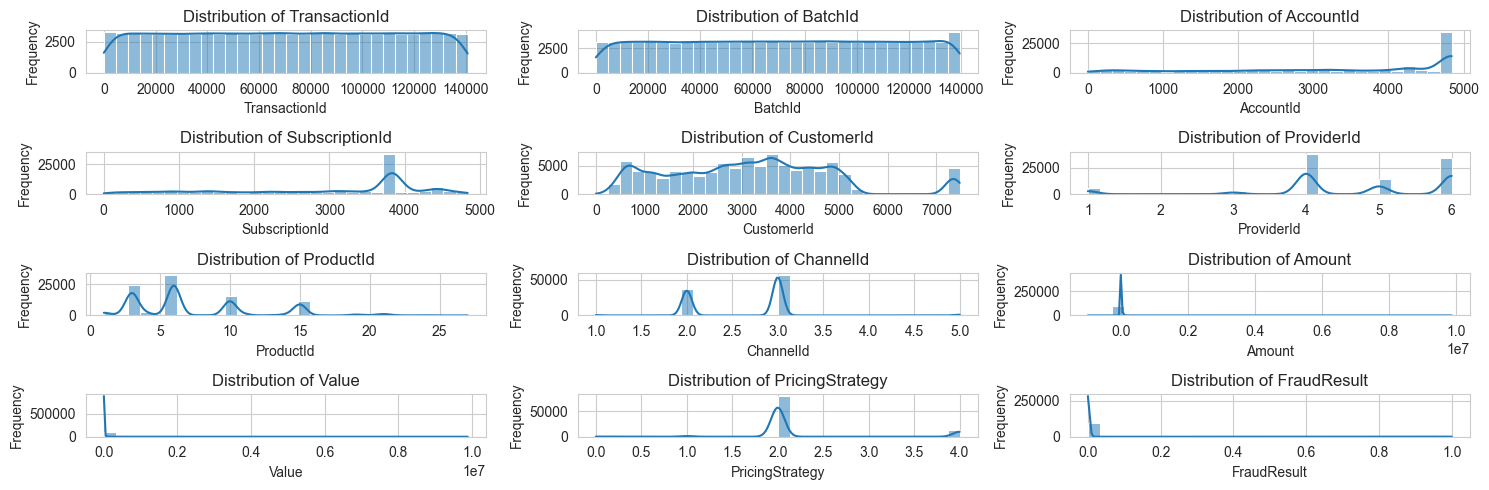

In [20]:
numeric_columns = ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'ProviderId', 
                   'ProductId', 'ChannelId', 'Amount', 'Value', 'PricingStrategy', 'FraudResult']
# Distributions of numerical columns
v.numerical_distribution(df, numeric_columns)

## Task4: Distribution of Categorical Features

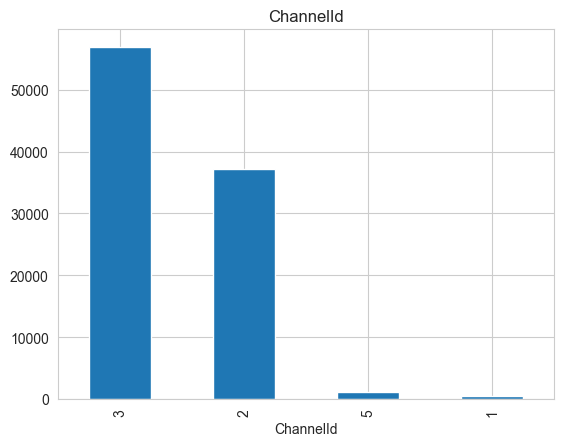

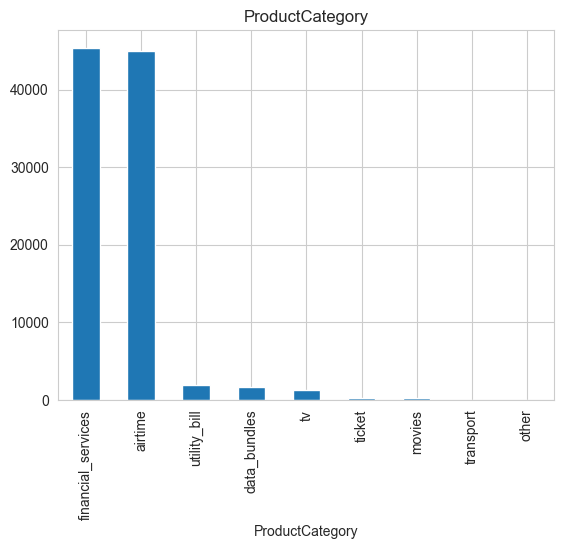

In [28]:
# Task 4: Distribution of Categorical Features
categorical_features = ['ChannelId', 'ProductCategory']
for feature in categorical_features:
    df[feature].value_counts().plot(kind='bar')
    plt.title(feature)
    plt.show()

* Financial services and Airtime has the highest occurrence compared to others. Therefore, isolating airtime from other features will be a good strategy.
* Fewer people opt in for ticket, movies, transport. Reducing the feature by grouping this together will help.

## Task 5: Correlation Analysis 

In [ ]:
# Correlation analysis 
v.correlation_analysis(df, numeric_columns)

## Task 6: Identifying Missing Values

In [17]:
dc.calculat_missing_percentage(df)

The dataset has 0.0% missing values.


In [18]:
dc.check_missing_values(df)

,Missing Values,% of Total Values,Data Types
TransactionId,0,0.0,int64
BatchId,0,0.0,int64
AccountId,0,0.0,int64
SubscriptionId,0,0.0,int64
CustomerId,0,0.0,int64
CurrencyCode,0,0.0,object
CountryCode,0,0.0,int64
ProviderId,0,0.0,int64
ProductId,0,0.0,int64
ProductCategory,0,0.0,object


## Task 7: Outlier Detection

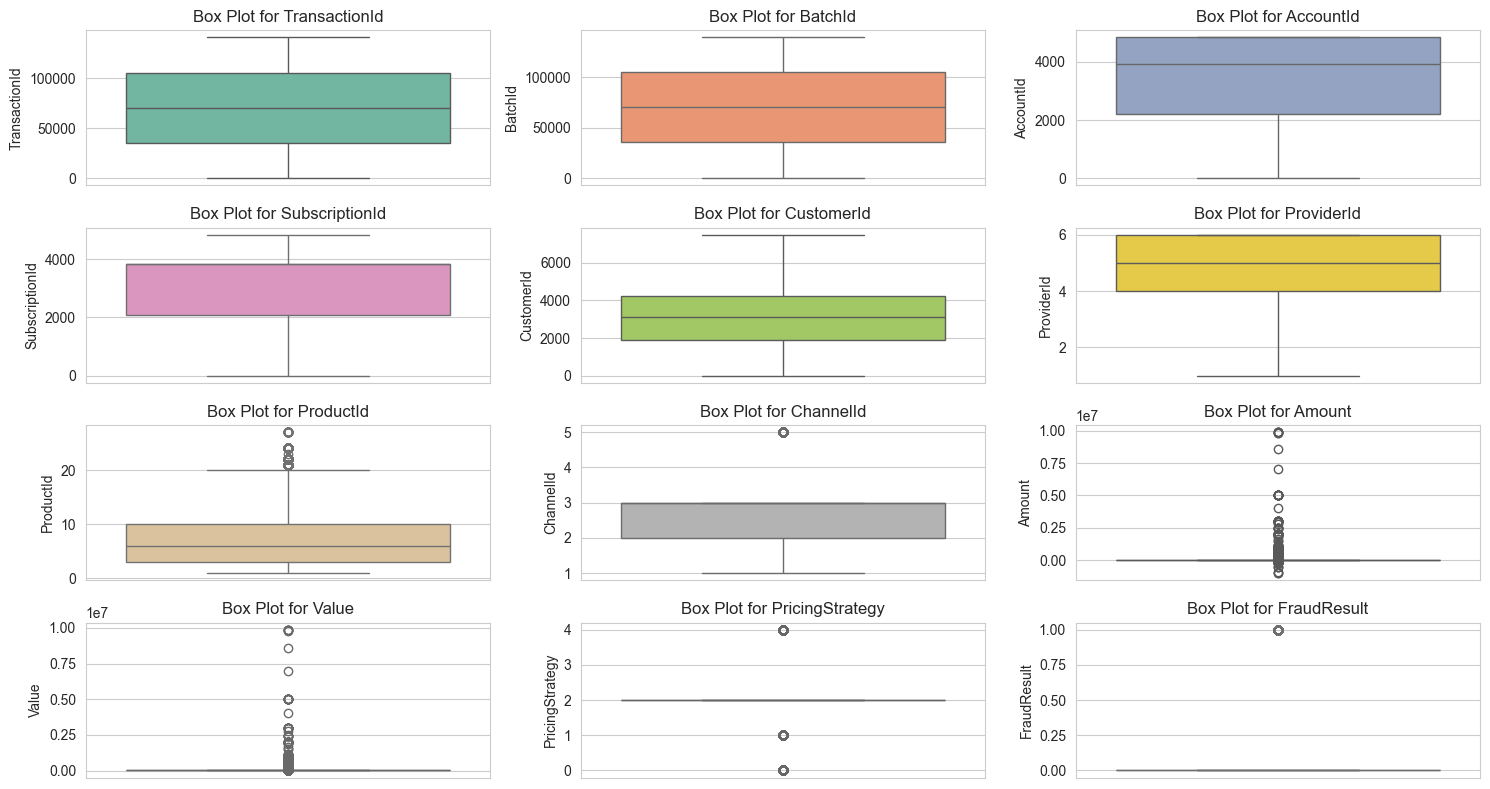

In [32]:
# Outlier Detection
v.outlier_detection(df, numeric_columns)

Based on the box plots you visual, here are some detailed insights from the data:

1. Transaction Patterns:
* **TransactionId** and **BatchId** show a relatively consistent distribution with few outliers, indicating stable transaction processing.
* **AccountId** and **SubscriptionId** have a wider spread, suggesting variability in account and subscription activities.
2. Customer and Provider Analysis:
* **CustomerId** and **ProviderId** exhibit significant variability, which could imply a diverse customer base and multiple service providers.
* The presence of outliers in these categories might indicate high-value customers or providers with unique transaction patterns.
3. Product and Channel Insights:
* **ProductId** and **ChannelId** show distinct distributions, which can help identify popular products and preferred channels.
* Outliers in these categories might highlight niche products or less common transaction channels.
4. Financial Metrics:
* **Value** and **Amount** have different medians and spreads, suggesting variations in transaction values and amounts.
* The outliers in **Amount** could indicate unusually high or low transaction amounts, which may warrant further investigation.
5. Pricing Strategy:
* **PricingStrategy** shows a wide range of values, indicating diverse pricing approaches.
* Outliers here might represent special pricing strategies or promotions.
6. Fraud Detection:
* **FraudResult** has several outliers, which could be potential fraud cases. This highlights the importance of robust fraud detection mechanisms.